# Noah Chan

## What is the impact of changes in course format (e.g., online, in-person, hybrid) on student course selection and academic performance in higher education?

Online classes and remote work have existed in some form for several decades, but they have become much more prevalent and widespread in recent years due to advancements in technology and the outbreak of COVID-19 pandemic. I am interested in if the rise of hybrid and online classes will completely replace in-person classes and if they are actually better for students. The research question is seeking to investigate the direction and strength of the relatiponshipship between student course selection and academic performance according to different course formats, and to determine whether course format is a significant predictor of student grades at UBC based on the data available on UBC Grades.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from my_code import project_functions3

In [ ]:
file_path = ('../data/raw/rawdata.csv')
df1 = project_functions3.load_and_process(file_path)
df1

,Year,Campus,Subject,Course,Mean,Median,Lower Quartile,Upper Quartile
0,2018.0,UBCO,ECON,101.0,65.8,65.7,65.2,66.2
1,2018.0,UBCO,ECON,102.0,66.2,66.1,66.0,66.3
2,2018.0,UBCO,ECON,204.0,64.5,64.7,61.8,67.3
3,2018.0,UBCO,ECON,205.0,58.4,58.3,57.9,58.8
4,2018.0,UBCO,ECON,221.0,71.1,71.1,71.1,71.1
...,...,...,...,...,...,...,...,...
954,2021.0,UBCV,POLI,449.0,80.4,80.4,73.9,87.0
955,2021.0,UBCV,POLI,460.0,85.2,85.2,82.2,88.1
956,2021.0,UBCV,POLI,462.0,79.5,79.5,79.5,79.5
957,2021.0,UBCV,POLI,464.0,84.1,84.6,82.6,85.0


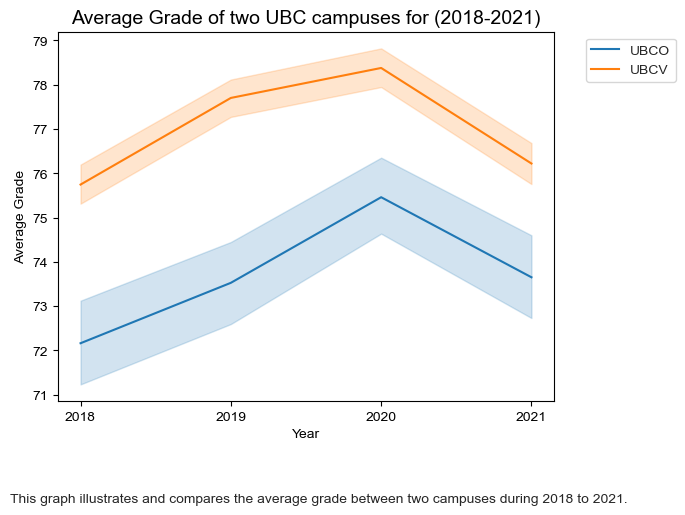

In [ ]:
df = pd.read_csv('../data/raw/rawdata.csv')
df
plot1 = sns.lineplot(x='Year', y='Avg', data=df,hue='Campus')
sns.set_style("white")
plt.xticks([2018, 2019, 2020, 2021])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Average Grade')
main_title = 'Average Grade of two UBC campuses for (2018-2021)'
description = "This graph illustrates and compares the average grade between two campuses during 2018 to 2021."
plt.title(main_title, fontsize=14)
plt.figtext(0.05,-0.1,"This graph illustrates and compares the average grade between two campuses during 2018 to 2021.")
#This graph illustrates and compares the average grade between two campuses during 2018 to 2021.
plt.savefig('analysis3image1', dpi=300)

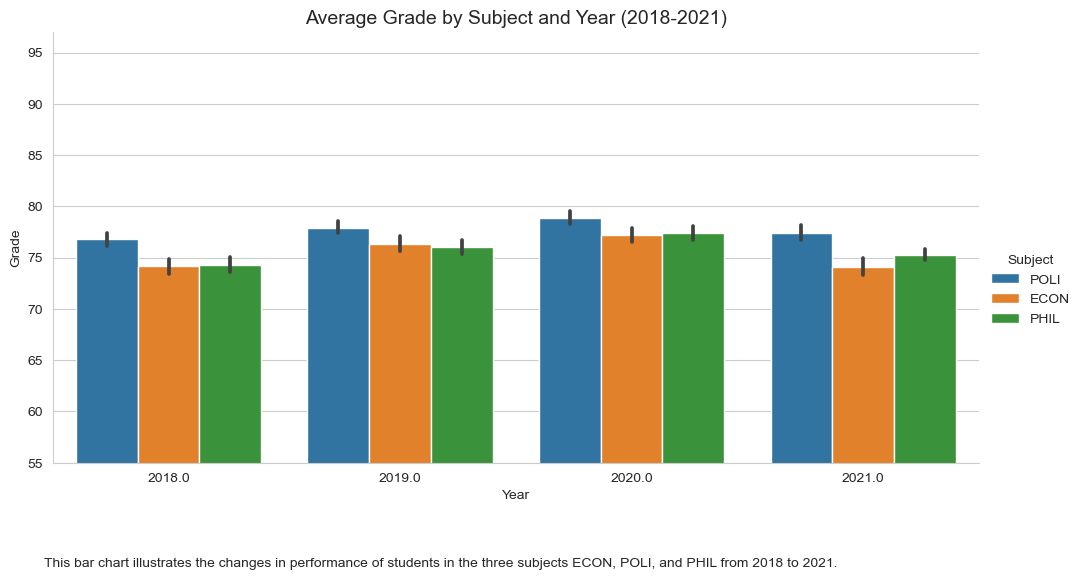

In [ ]:
ymin = np.floor(df["Avg"].min())
ymax = np.ceil(df["Avg"].max())
sns.set_style("whitegrid")
plot2 = sns.catplot(x="Year", y="Avg", hue="Subject", kind="bar", data=df, height=5, aspect=2)
main_title = 'Average Grade by Subject and Year (2018-2021)'
plt.figtext(0.05,-0.1,"This bar chart illustrates the changes in performance of students in the three subjects ECON, POLI, and PHIL from 2018 to 2021.")
plt.title(main_title, fontsize=14)
plt.ylabel('Grade')
plot2.set(ylim=(ymin, ymax))
sns.set_context("poster", font_scale=0.5)
plt.savefig('analysis3image2', dpi=300)
#This bar chart illustrates the changes in performance of students in the three subjects ECON, POLI, and PHIL from 2018 to 2021.


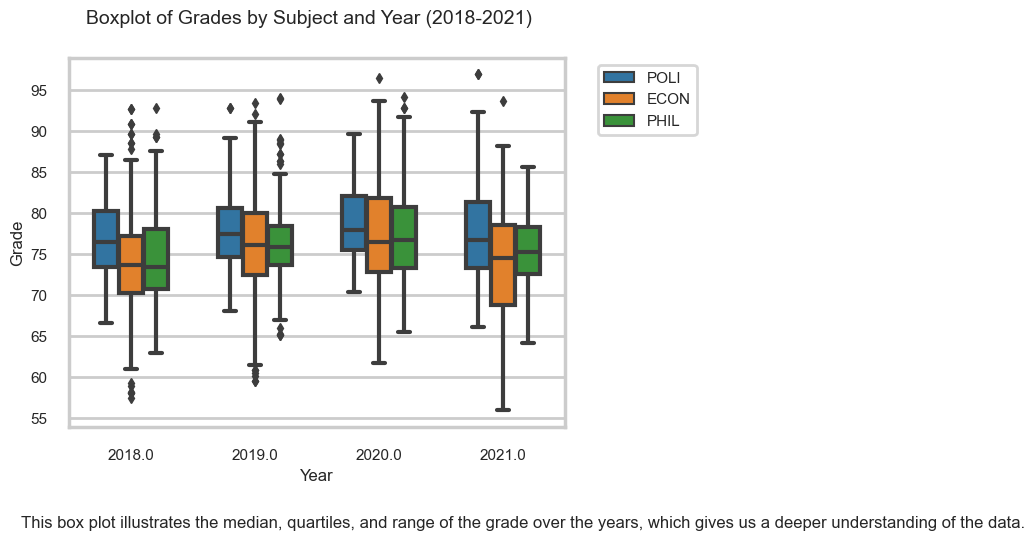

In [ ]:
plot3 = sns.boxplot(x="Year", y="Avg", hue="Subject", data=df, width=0.6)
sns.set_style("whitegrid")
sns.set_palette("Set2")     
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
main_title = 'Boxplot of Grades by Subject and Year (2018-2021)'
description = "This box plot illustrates the median, quartiles, and range of the grade over the years, which gives us a deeper understanding of the data."
plt.figtext(0.05,-0.1,"This box plot illustrates the median, quartiles, and range of the grade over the years, which gives us a deeper understanding of the data.")
plt.suptitle(main_title, fontsize=14)
plt.ylabel('Grade')
#This box plot illustrates the median, quartiles, and range of the grade over the years, which gives us a deeper understanding of the data.
plt.savefig('analysis3image3', dpi=300)